In [1]:
import numpy as np
import keras as ks
import matplotlib.pyplot as plt
from ipywidgets import interact
from matplotlib import colors

Using TensorFlow backend.


In [2]:
path = '/home/ht/EmuPBk/data/data_Bispectrum/k0.2/'

In [3]:
Bk_02_test = np.loadtxt(path+'Bk_test')
params_test = np.loadtxt(path+'params_test')
x_H1_test = np.loadtxt(path+'x_HI02')
index = np.loadtxt(path+'index')

In [4]:
model = ks.models.load_model(path+'98bk02.h5')

In [5]:
Bk_02_pdct = model.predict(params_test)

In [6]:
Bk_02_pdct.shape, Bk_02_test.shape

((18, 550), (18, 550))

In [7]:
ind = np.zeros(len(index),dtype = int)
for i in range(len(ind)):
    ind[i] = int(index[i])

In [8]:
x_H1_test = x_H1_test[ind]

In [ ]:
cov = np.zeros(shape=(len(Bk_02_test),550,550))
for i in range(len(Bk_02_test)):
    for j in range(550):
        cov[i][j][j] = Bk_02_test[i][j]/np.sqrt(N_bins_test[i][j])

In [ ]:
np.savetxt(path+'cov_inv_test',cov[0])

In [9]:
k1 = np.array([0.1903934])
#k1 = np.array([0.3220935, 1.559453 ])
k2byk1 = np.arange(0.50,1.05,0.05) 		#======Ratio k2byk1========#
cosalpha = np.arange(0.50,1.00,0.01)	#======cosine of the angle between the k2 and k1 arms =======#
k2byk1 = k2byk1.reshape(11,1)
k2byk1.shape, cosalpha.shape

((11, 1), (50,))

In [48]:
def Bk(params):
    Bk = model.predict(params)
    Bk = np.reshape(Bk,(11,50))
    Bk = Bk*100.
    cond = k2byk1*cosalpha
    for j in range(len(k2byk1)):
        for k in range(len(cosalpha)):
            if cond[j][k] < 0.5:
                Bk[j][k] = np.nan
    Bk = np.ma.masked_invalid(Bk)
    return Bk

In [51]:
def plot(N_ion,R_mfp,NoH):
    
    plt.figure(figsize= (8,7))
    plt.tick_params(labelsize=10)

    plt.suptitle(r'At $k_1$ = {0:f}, $\zeta$ = {1:.2f}, $Rmfp$= {2:.2f}, $M_h$= {3:.2f}$\times 10^8 M_\odot$'
                 .format(k1[0],N_ion , R_mfp ,1.087*NoH),size=15)
    
    plt.title('Bispectrum')
    plt.imshow(Bk([[[N_ion,R_mfp,NoH]]]),origin='lower',extent=[0.50,0.99,0.50,1.00],cmap="Spectral",norm=colors.SymLogNorm(linthresh=1, linscale=1,
                                              vmin=-10000.0, vmax=10000.0))
    cbar = plt.colorbar(label=r"$\frac{k_1^3.k_2^3.B(k_1,k_2,k_3).\delta T_b^3}{(2\pi^2)^2}$",)
    cbar.ax.yaxis.label.set_size(20,)
    plt.xlabel(r'$cos(\alpha)$')
    plt.ylabel(r'$k_2/k_1$')   

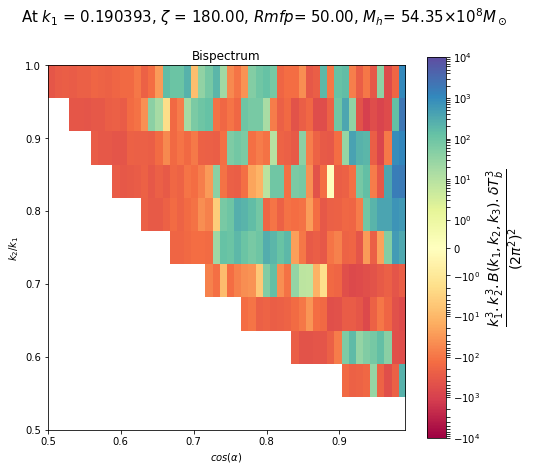

In [53]:
interact(plot,N_ion=(20,200,10),R_mfp = (10,100,10),NoH=(10,1500,20))

In [10]:
Bk_test = np.zeros(shape=(len(Bk_02_test),11,50))
Bk_pdct = np.zeros(shape=(len(Bk_02_pdct),11,50))
for i in range(len(Bk_02_test)):
    Bk_pdct[i] = Bk_02_pdct[i].reshape(11,50)
    Bk_test[i] = Bk_02_test[i].reshape(11,50)

Bk_pdct = Bk_pdct*100
Bk_test = Bk_test

In [11]:
cond = k2byk1*cosalpha


In [12]:
cond = k2byk1*cosalpha
for i in range(len(Bk_test)):
    for j in range(len(k2byk1)):
        for k in range(len(cosalpha)):
            if cond[j][k] < 0.5:
                Bk_pdct[i][j][k] = np.nan
                Bk_test[i][j][k] = np.nan

Bk_pdct = np.ma.masked_invalid(Bk_pdct)
Bk_test = np.ma.masked_invalid(Bk_test)

In [46]:
def plot(test_set):
    index = test_set
    plt.figure(figsize= (16,6))
    plt.tick_params(labelsize=10)

    #fig.colorbar(pcm, ax=ax[0], extend='both')
    plt.suptitle(r'At $k_1$ = {0:f},$x_H$ = {1:.3f}, $\zeta$ = {2:.2f}, $Rmfp$= {3:.2f}, $M_h$= {4:.2f}$\times 10^8 M_\odot$'
                 .format(k1[0],x_H1_test[index],params_test[index][0] , params_test[index][1] ,1.087*params_test[index][2]),size=15)
    
   
    plt.subplot(1,2,1)
    plt.title('Bispectrum')
    plt.imshow(Bk_test[index],origin='lower',extent=[0.50,0.99,0.50,1.00], cmap="Spectral",norm=colors.SymLogNorm(linthresh=1, linscale=1,
                                              vmin=-10000.0, vmax=10000.0))
    cbar = plt.colorbar(label=r"$\frac{k_1^3.k_2^3.B(k_1,k_2,k_3).\delta T_b^3}{(2\pi^2)^2}$",)
    cbar.ax.yaxis.label.set_size(20,)
    plt.xlabel(r'$cos(\alpha)$')
    plt.ylabel(r'$k_2/k_1$')   
    
    plt.subplot(1,2,2)
    plt.title('ANN prediction')
    plt.imshow(Bk_pdct[index],origin='lower',extent=[0.50,0.99,0.50,1.00], cmap="Spectral",norm=colors.SymLogNorm(linthresh=1, linscale=1,
                                              vmin=-10000.0, vmax=10000.0))
    cbar = plt.colorbar(label=r"$\frac{k_1^3.k_2^3.B(k_1,k_2,k_3).\delta T_b^3}{(2\pi^2)^2}$",)
    cbar.ax.yaxis.label.set_size(20,)
    plt.ylabel(r'$k_2/k_1$') 
    plt.xlabel(r'$cos(\alpha)$')
    
  

            

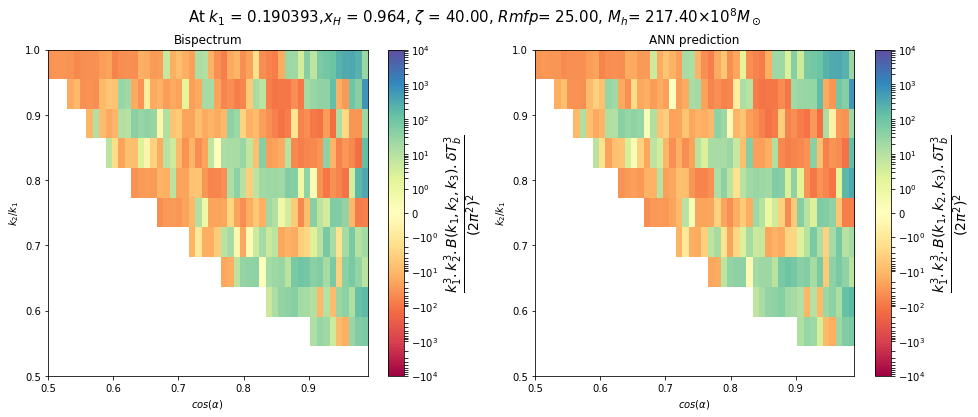

In [47]:
interact(plot, test_set =(0,len(Bk_test)-1,1))

In [ ]:
import cPickle as cp
import numpy as np

In [ ]:
Ntbins02 = cp.load(open('N0.2.pkl','rb'))
Ntbins03 = cp.load(open('N0.3.pkl','rb'))
Ntbins15 = cp.load(open('N15.pkl','rb'))
Bk = cp.load(open('Bispec0.2.pkl','rb'))

In [ ]:
Ntbins02.shape,Ntbins03.shape,Ntbins15.shape,Bk.shape

In [ ]:
a = np.argwhere(np.isnan(Bk))
a= a[:,0]
a = set(a)
a = list(a)
a

In [ ]:
Ntbins02 = np.delete(Ntbins02,a,axis = 0)
Ntbins03 = np.delete(Ntbins03,a,axis = 0)
Ntbins15 = np.delete(Ntbins15,a,axis = 0)
Bk = np.delete(Bk,a,axis=0)

In [ ]:
Ntbins02,Ntbins03,Ntbins15

In [ ]:
rootN = np.sqrt(Ntbins02)

In [ ]:
sigma = np.zeros(shape=Bk.shape)
for i in range(len(Bk)):

    sigma[i] = Bk[i]*1./rootN[i]

In [ ]:
sigma